# Naive GaussianNB

In questa breve esercitazione proviamo ad implementare da zero una versione molto semplice del Naive Bayes gaussiano. 

Ecco quello che faremo, supponendo di avere un problema per il quale abbiamo **tre** classi di uscita ($c_{1}$, $c_{2}$, $c_{3}$) e un dataset con sole **due** feature ($x_{1}$, $x_{2}$)
- Generazione randomica del nostro dataset
- Calcolo per ogni classe:
    - della probabilità *a priori*
- Calcolo di, **per ogni classe e per ogni feature**:
    - media
    - deviazione standard
- Calcolo della classe di uscita di un'osservazione non nota $x_{u}$


In [77]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.dpi"] = 300

In [78]:
X, y = make_blobs(
    n_samples=11, 
    centers=[
        (0,0), 
        (2,2), 
        (-2, 2)
    ], 
    random_state=0,
    cluster_std=0.4
)

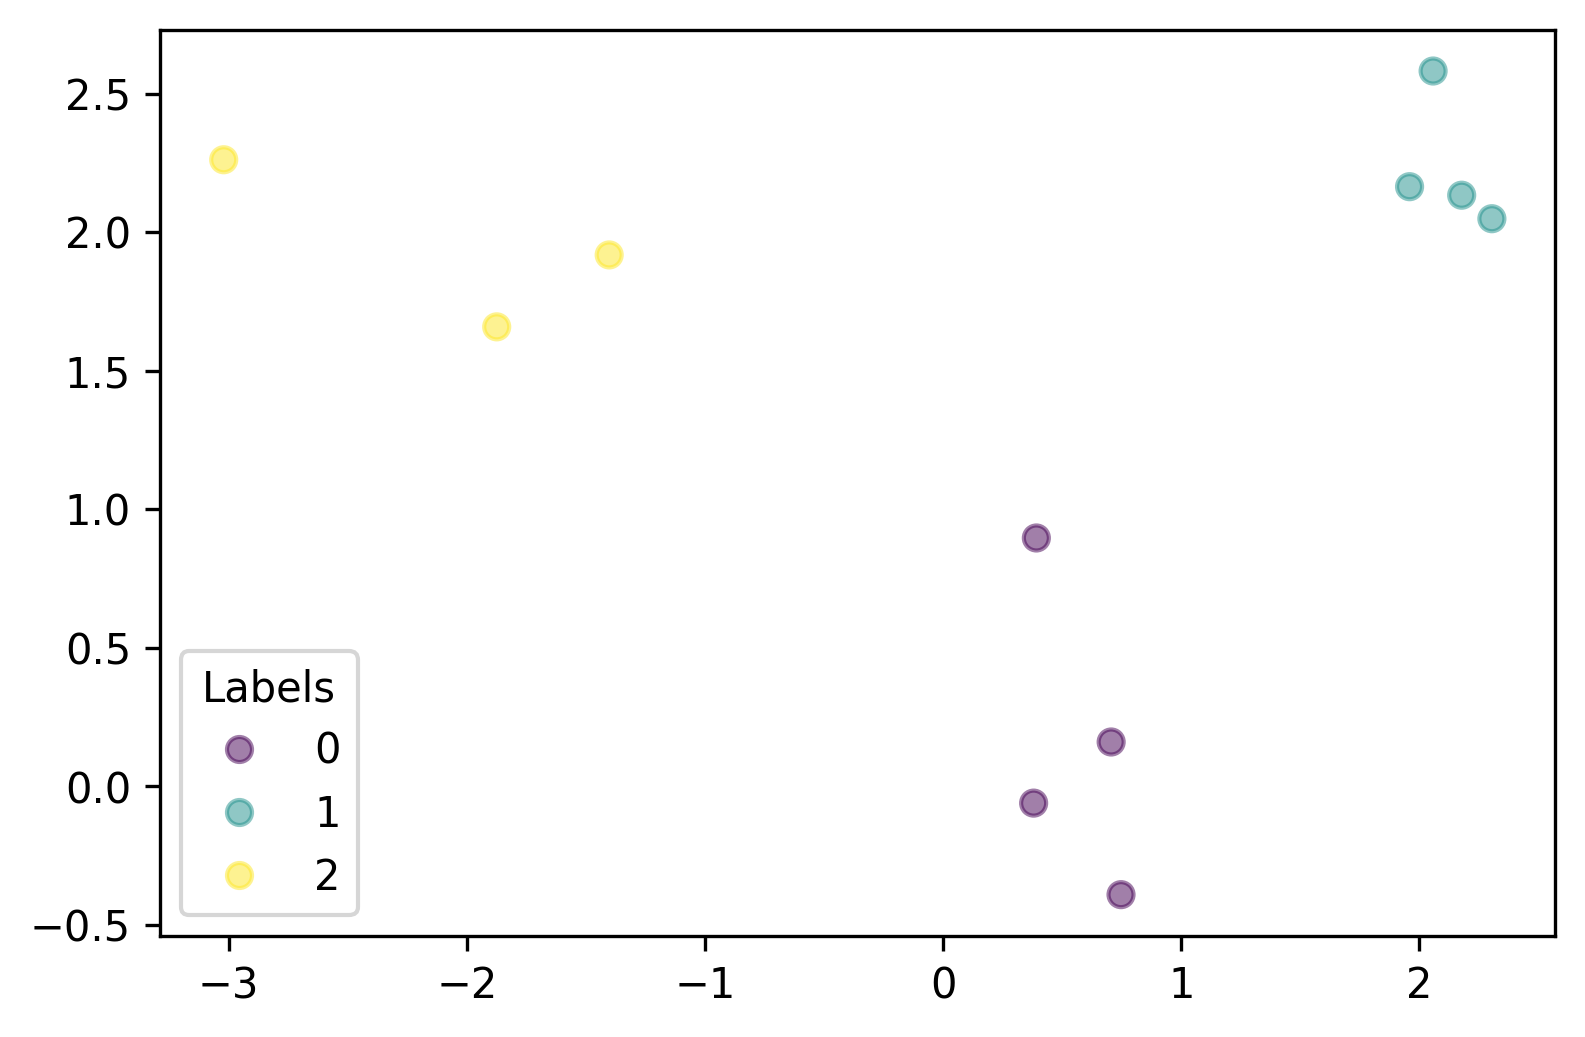

In [79]:
unique = list(np.unique(y))

scatter = plt.scatter(
    X[:, 0], # [i[0] for i in X]
    X[:, 1], # [i[1] for i in X],
    c=y,
    alpha=0.5
)

l = scatter.legend_elements(num=unique)[0]

plt.legend(handles=l, labels=unique, title="Labels")

plt.show()

Calcoliamo adesso, *per ogni classe*, la sua probabilità **prior**, vale a dire probabilità che se estraiamo un elemento casuale dal nostro dataset, esso appartenga a una delle classi di uscita. Per farlo ci basta calcolare le frequenze relative della classe nel nostro dataset: il numero di entry di una classe diviso il numero totale di entry.

In [31]:
priors = np.bincount(y) / len(y)
# Count number of occurrences of each value in array of non-negative ints

print(priors)

[0.33333333 0.33333333 0.33333333]


Calcoliamo adesso, *per ogni classe e per ogni feature*, la media e la deviazione standard, utilizzando la list comprehension di Python:

In [5]:
def mean_from_scratch(X, y):
    l = []
    for i in range(len(unique)):
        column = X[np.where(y==i)]
        l.append(
            column.mean(axis=0)
        )
    return np.array(l)


means = np.array([X[np.where(y==i)].mean(axis=0) for i in range(3)])
print(np.equal(means, mean_from_scratch(X, y)))


stds = np.array([X[np.where(y==i)].std(axis=0) for i in range(3)])

print(f"Medie: \n{means}")
print(f"Std. Dev: \n{stds}")

[[ True  True]
 [ True  True]
 [ True  True]]
Medie: 
[[ 0.61471311  0.22183634]
 [ 2.13212175  2.22846864]
 [-1.640136    2.03335881]]
Std. Dev: 
[[0.15874133 0.52733732]
 [0.17989148 0.26610279]
 [0.17592436 0.08865456]]


Calcoliamo ora le predizioni effettuate su una nuova osservazione, sapendo che la formula da usare per calcolare $p(x_{i}|c_{j})$ sarà la seguente

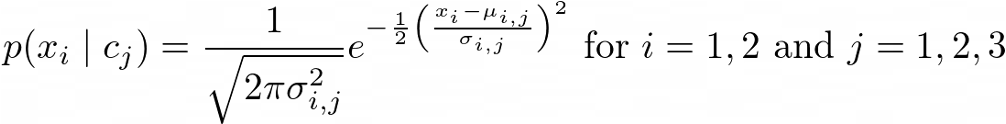

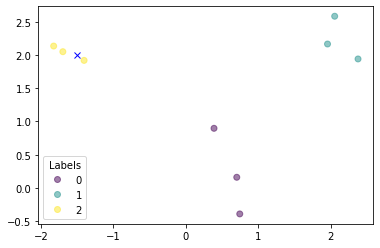

In [68]:
x_u = np.array([-1.5, 2])

unique = list(np.unique(y))

scatter = plt.scatter(
    X[:, 0], # [i[0] for i in X]
    X[:, 1], # [i[1] for i in X],
    c=y,
    alpha=0.5
)

l = scatter.legend_elements(num=unique)[0]

plt.legend(handles=l, labels=unique, title="Labels")
plt.plot(x_u[0], x_u[1], "bx")


plt.show()



In [69]:
def gaussian(x, mean, std_dev):
    return 1/np.sqrt(
        2*np.pi*std_dev**2
    )* np.exp(-0.5 * ( (x-mean)/std_dev)**2 )


probabilities = [] # In probabilities avrò le probabilità delle 2 feature per ciascuna delle 3 classi
print(x_u)
for i in range(len(unique)):
    # Per ogni classe calcolo le probabilità di ogni feature
    prob = 1
    for j in range(X.shape[1]):
        print(f"Prob per classe {i} e feature {j}")
        prob *= gaussian(x_u[j], means[i][j], stds[i][j])
    probabilities.append(prob.prod()*priors[i])
    
for i, p in enumerate(probabilities):
    print(f"class {i} -> {p:.12f}")

[-1.5  2. ]
Prob per classe 0 e feature 0
Prob per classe 0 e feature 1
Prob per classe 1 e feature 0
Prob per classe 1 e feature 1
Prob per classe 2 e feature 0
Prob per classe 2 e feature 1
class 0 -> 0.000000000000
class 1 -> 0.000000000000
class 2 -> 2.307501309242


Queste non sono delle vere e proprie probabilità (la loro somma non è 1) perchè non stiamo dividendo per $p(x_{1}, x_{2})$. Possiamo ottenere dei valori congrui di probabilità dividendo ciascun numero per la somma dei tre valori ottenuti:

In [73]:
for i, p in enumerate(probabilities):
    probabilities[i] = p / np.sum(probabilities)

Classe di uscita: 2


In [71]:
for i, p in enumerate(probabilities):
    print(f"class {i} -> {p:.12f}")

class 0 -> 0.000000000000
class 1 -> 0.000000000000
class 2 -> 1.000000000000


In [74]:
print(f"Classe di uscita: {np.argmax(probabilities)}")

Classe di uscita: 2
